<a href="https://colab.research.google.com/github/yamini542/AppliedAI_Assignments/blob/main/ASS_3_ImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import os
import pandas as pd
import numpy as np

import cv2
from skimage.feature import hog

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

# libraries for data plotting
import seaborn as sns
import matplotlib.pyplot as plt 

# library for evaluation
from sklearn import metrics

# libraries for ML algorithms
from sklearn import svm

from random import randint
from random import seed

RANDOM_SEED = 100

In [2]:
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_folder1 = '/content/drive/MyDrive/Applied_Ai'
#data_folder2='/content/drive/MyDrive/Applied_Ai'


In [4]:
# load training data
df_train = pd.read_csv(os.path.join(data_folder1, 'train.csv'))

# summarise the details
print(f'Number of entries: {len(df_train)}')
df_train.head()
     

Number of entries: 10000


,id,label
0,1,cat
1,2,dog
2,3,cat
3,4,cat
4,5,cat


In [5]:

# load testing data
df_test = pd.read_csv(os.path.join(data_folder1, 'test.csv'))

# summarise the details
print(f'Number of entries: {len(df_test)}')
df_test.head()
     

Number of entries: 1000


,id
0,1
1,2
2,3
3,4
4,5


<AxesSubplot:xlabel='label', ylabel='count'>

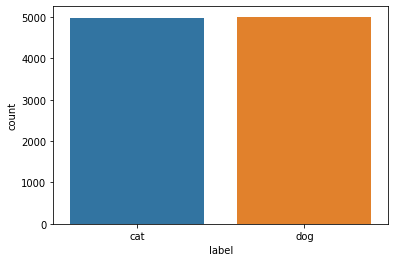

In [6]:

# Summarise label details in training data
sns.countplot(x=df_train['label'])

In [7]:
# parameters
# ids - list of image ids
# folder_path - path to image folder
# dim - dimensions to resize images
def load_images(ids, folder_path, dim):
  images = []
  for id in ids:
    image_path = os.path.join(folder_path, f'{id}.jpg')
    img = cv2.imread(image_path)

    # Resize if necessary
    if img.shape[0] != dim[1] or img.shape[1] != dim[0]:
      img = cv2.resize(img, dim)
    images.append(img)
  return images

In [8]:
base_dim = (200, 200)

# load train images
train_image_folder = os.path.join(data_folder1,'train_images')
train_image = load_images(df_train['id'], train_image_folder, base_dim)
print(f'Number of training images loaded: {len(train_image)}')

# load test images
# test_image_folder = os.path.join(data_folder2, 'test_images')
# test_image = load_images(df_test['id'], test_image_folder, base_dim)
# print(f'Number of testing images loaded: {len(test_image)}')

Number of training images loaded: 10000


In [9]:
train_image_folder

'/content/drive/MyDrive/Applied_Ai/train_images'

In [10]:
train_image[0]

array([[[211, 216, 214],
        [211, 216, 214],
        [211, 216, 214],
        ...,
        [200, 194, 195],
        [201, 196, 196],
        [203, 198, 197]],

       [[210, 215, 213],
        [207, 212, 210],
        [206, 211, 209],
        ...,
        [206, 200, 201],
        [204, 199, 199],
        [206, 201, 200]],

       [[210, 215, 213],
        [206, 211, 209],
        [204, 209, 207],
        ...,
        [207, 201, 202],
        [203, 198, 197],
        [206, 200, 200]],

       ...,

       [[128, 104,  78],
        [122,  98,  69],
        [118,  92,  61],
        ...,
        [120, 129, 139],
        [123, 132, 142],
        [123, 132, 142]],

       [[124, 103,  76],
        [121,  97,  68],
        [115,  87,  57],
        ...,
        [124, 133, 143],
        [123, 132, 142],
        [123, 132, 142]],

       [[122, 101,  74],
        [119,  96,  68],
        [112,  84,  53],
        ...,
        [124, 133, 143],
        [123, 132, 142],
        [123, 132, 142]]

In [9]:
# method to plot confusion matrix
def plot_confusion_matrix(matrix):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    classNames = ['0', '1']
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

# method to calculate evaluation results
def evaluate(actuals, predictions):
  accuracy = metrics.accuracy_score(actuals, predictions)
  confusion_matrix = metrics.confusion_matrix(actuals, predictions, labels=[0, 1])
  return accuracy, confusion_matrix

#Feature extraction and model generation

In [12]:

def build_svm_model(X_train, X_val, y_train, y_val):
  # build model
  clf = svm.SVC(kernel='linear', random_state=RANDOM_SEED) 
  clf.fit(X_train, y_train)
  return clf

In [13]:
# method to get image features
def get_features_m1(images):
  features_list = []
  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # vectorise/ feature extraction
    features = img_grayscaled.flatten()

    features_list.append(features)

  features_list = np.array(features_list)
  return features_list

In [14]:
# feature extraction
features_train = get_features_m1(train_image)
print(features_train.shape)

(10000, 40000)


In [15]:
# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train model
m1 = build_svm_model(X_train, X_val, y_train, y_val)

In [ ]:
y_val.map({'cat':0,'dog':1})
np.where(y_pred=='dog',1,0)

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

Accuracy: 0.516


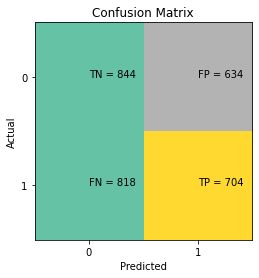

In [16]:
# make predictions on validation data
y_pred = m1.predict(X_val)

# evaluate model
accuracy, confusion_matrix = evaluate(y_val.map({'cat':0,'dog':1}),np.where(y_pred=='dog',1,0))
print(f'Accuracy: {accuracy}')
plot_confusion_matrix(confusion_matrix)


In [ ]:
y_val

249    dog
353    dog
537    dog
424    cat
564    dog
      ... 
193    cat
838    dog
974    dog
203    dog
425    dog
Name: label, Length: 300, dtype: object

In [ ]:
y_pred

array(['cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat',
       'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog',
       'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat',
       'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat',
       'cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat',
       'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog',
       'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat',
       'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat',
       'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat',
       'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog',
       'cat', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat',
       'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog',
       'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog',
       'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog',
       'cat', 'cat',

In [ ]:
X_val

array([[120,  54,  58, ...,  13,  11,   4],
       [201, 196, 198, ..., 196, 195, 194],
       [179, 181, 180, ...,  70,  68,  70],
       ...,
       [175, 166, 193, ..., 189, 137, 151],
       [ 42,  80, 115, ...,  63,  66,  72],
       [116,  77, 134, ..., 137, 134, 141]], dtype=uint8)

In [17]:
# load test images
test_image_folder = os.path.join(data_folder1, 'test_images')
test_image = load_images(df_test['id'], test_image_folder, base_dim)
print(f'Number of testing images loaded: {len(test_image)}')

Number of testing images loaded: 1000


In [18]:
# feature extraction - test data
features_test = get_features_m1(test_image)
print(features_test.shape)

# get model predictions
predictions = m1.predict(features_test)
print(predictions)
     

(1000, 40000)
['cat' 'dog' 'cat' 'cat' 'cat' 'dog' 'dog' 'cat' 'cat' 'cat' 'cat' 'dog'
 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat' 'dog' 'dog' 'dog' 'cat'
 'dog' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat' 'dog' 'dog' 'cat' 'cat' 'cat'
 'dog' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'cat'
 'cat' 'cat' 'dog' 'cat' 'cat' 'cat' 'dog' 'cat' 'dog' 'dog' 'cat' 'dog'
 'cat' 'cat' 'cat' 'cat' 'dog' 'cat' 'dog' 'dog' 'dog' 'cat' 'cat' 'dog'
 'dog' 'cat' 'cat' 'dog' 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat'
 'cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog'
 'cat' 'cat' 'dog' 'cat' 'dog' 'dog' 'cat' 'dog' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'dog' 'cat' 'dog' 'cat' 'cat' 'cat'
 'dog' 'cat' 'dog' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'dog'
 'cat' 'cat' 'cat' 'dog' 'dog' 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'cat'
 'dog' 'cat' 'cat' 'dog' 'cat' 'dog' 'dog' 'cat' 'dog' 'cat' 'dog' 'cat'
 'dog' 'dog' 'dog' 'cat' 'cat' 'dog' 

Model M2
Preprocessing - gray scaling, smoothing
Features - image vector
Algorithm - SVM

In [ ]:
# method to get image features
def get_features_m2(images):
  features_list = []
  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #grey s ale with edge and hog
    img_blurred = cv2.GaussianBlur(img_grayscaled,(3,3), 2)

    # vectorise/ feature extraction
    features = img_blurred.flatten()

    features_list.append(features)

  features_list = np.array(features_list)
  return features_list

In [ ]:

# feature extraction
features_train = get_features_m2(train_image)
print(features_train.shape)

(10000, 10000)


In [ ]:
#data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

#train model
m2 = build_svm_model(X_train, X_val, y_train, y_val)

Accuracy: 0.506


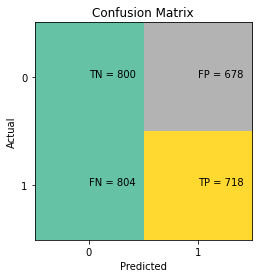

In [ ]:

# make predictions on validation data
y_pred = m2.predict(X_val)

# evaluate model
accuracy, confusion_matrix = evaluate(y_val.map({'cat':0,'dog':1}),np.where(y_pred=='dog',1,0))
print(f'Accuracy: {accuracy}')
plot_confusion_matrix(confusion_matrix)


In [ ]:
# feature extraction - test data
features_test = get_features_m2(test_image)
print(features_test.shape)

# get model predictions
predictions = m2.predict(features_test)

print(predictions)

Model M3
Preprocessing - gray scaling
Features - edge map to vector
Algorithm - SVM

In [ ]:
# method to get image features
def get_features_m3(images):
  features_list = []
  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # feature extraction
    edges_canny = cv2.Canny(img_grayscaled, 100, 200) 
    features = edges_canny.flatten()

    features_list.append(features)

  features_list = np.array(features_list)
  return features_list

train and validate model


In [ ]:
# feature extraction
features_train = get_features_m3(train_image)
print(features_train.shape)

In [ ]:
# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train model
m3 = build_svm_model(X_train, X_val, y_train, y_val)

In [ ]:

# make predictions on validation data
y_pred = m3.predict(X_val)

# evaluate model
accuracy, confusion_matrix = evaluate(y_val, y_pred)
print(f'Accuracy: {accuracy}')
plot_confusion_matrix(confusion_matrix)

make predictions on test-images

In [ ]:
# feature extraction - test data
features_test = get_features_m3(test_image)
print(features_test.shape)

# get model predictions
predictions = m3.predict(features_test)

print(predictions)

MOdel-4
Preprocessing - gray scaling
Features - HOG features
Algorithm - SVM

In [ ]:
# method to get image features
def get_features_m4(images):
  features_list = []
  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Resize image if necessary
    img_resized = cv2.resize(img_grayscaled, (64, 128))

    # feature extraction
    features, hog_image = hog(img_resized, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True)

    features_list.append(features)

  features_list = np.array(features_list)
  return features_list
     

In [ ]:
# feature extraction
features_train_4 = get_features_m4(train_image)
print(features_train.shape)

(10000, 3780)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(features_train_4, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train model
m4 = build_svm_model(X_train, X_val, y_train, y_val)

Accuracy: 0.513


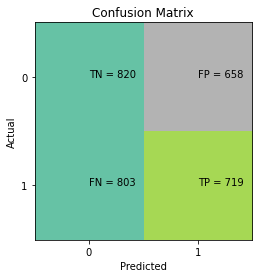

In [ ]:

# make predictions on validation data
y_pred = m4.predict(X_val)

# evaluate model
accuracy, confusion_matrix = evaluate(y_val.map({'cat':0,'dog':1}),np.where(y_pred=='dog',1,0))
print(f'Accuracy: {accuracy}')
plot_confusion_matrix(confusion_matrix)


preprocessing:
grayscale resize 
SVM

In [ ]:
import cv2
from skimage.feature import hog

# method to get image features
def get_features_m5(images, size=(128, 128)):
  features_list = []
  for img in images:
    # image preprocessing
    img_resized = cv2.resize(img, size)
    img_grayscaled = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

    # HOG feature extraction
    hog_features = hog(img_grayscaled, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')

    # vectorise/ feature extraction
    features = np.concatenate((img_grayscaled.flatten(), hog_features))

    features_list.append(features)

  features_list = np.array(features_list)
  return features_list


In [ ]:

# feature extraction
features_train5 = get_features_m5(train_image)
print(features_train.shape)

(10000, 10000)


In [ ]:
#data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train5, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

#train model
m5 = build_svm_model(X_train, X_val, y_train, y_val)

Accuracy: 0.505


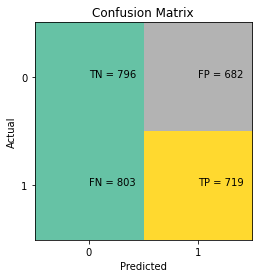

In [ ]:

# make predictions on validation data
y_pred = m5.predict(X_val)

# evaluate model
accuracy, confusion_matrix = evaluate(y_val.map({'cat':0,'dog':1}),np.where(y_pred=='dog',1,0))
print(f'Accuracy: {accuracy}')
plot_confusion_matrix(confusion_matrix)


Grayscale
Hog

In [ ]:
# method to get image features
def get_features_m6(images):
  features_list = []
  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # gray scale with edge and hog
    img_blurred = cv2.GaussianBlur(img_grayscaled,(3,3), 2)
    hog_feature = hog(img_blurred)

    # vectorize/ feature extraction
    features = np.hstack([img_blurred.flatten(), hog_feature])

    features_list.append(features)

  features_list = np.array(features_list)
  return features_list

# call the method to extract features
features_train6 = get_features_m6(train_image)


In [ ]:
#data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train6, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

#train model
m6 = build_svm_model(X_train, X_val, y_train, y_val)

In [ ]:

# make predictions on validation data
y_pred = m6.predict(X_val)

# evaluate model
accuracy, confusion_matrix = evaluate(y_val.map({'cat':0,'dog':1}),np.where(y_pred=='dog',1,0))
print(f'Accuracy: {accuracy}')
plot_confusion_matrix(confusion_matrix)


Grayscale + Resize + SIFT

In [ ]:
# method to get image features
def get_features_m4(images, resized_dim=(128, 128)):
  features_list = []
  sift = cv2.xfeatures2d.SIFT_create()
  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_resized = cv2.resize(img_grayscaled, resized_dim)

    # feature extraction
    kp, des = sift.detectAndCompute(img_resized,None)
    if des is None:
      des = np.zeros((1,128))
    features = des.flatten()

    features_list.append(features)

  features_list = np.array(features_list)
  return features_list

# call the method to extract features
features_train = get_features_m4(train_image)


#model-2

Random Forest Classifer
Gray scale

In [10]:
from sklearn.ensemble import RandomForestClassifier

def build_rf_model(X_train, X_val, y_train, y_val):
    # build model
    clf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)
    clf.fit(X_train, y_train)
    return clf

In [20]:
# method to get image features
def get_features_m1_r(images):
  features_list = []
  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # vectorise/ feature extraction
    features = img_grayscaled.flatten()

    features_list.append(features)

  features_list = np.array(features_list)
  return features_list

In [21]:
# feature extraction
features_train_r = get_features_m1_r(train_image)
print(features_train_r.shape)

(10000, 40000)


In [22]:
X_train, X_val, y_train, y_val = train_test_split(features_train_r, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train model
m1_r = build_rf_model(X_train, X_val, y_train, y_val)

Accuracy: 0.6073333333333333


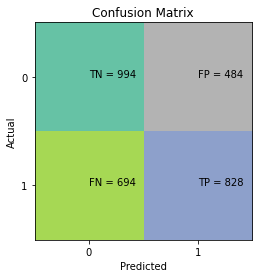

In [23]:

# make predictions on validation data
y_pred_1r = m1_r.predict(X_val)

# evaluate model
accuracy, confusion_matrix = evaluate(y_val.map({'cat':0,'dog':1}),np.where(y_pred_1r=='dog',1,0))
print(f'Accuracy: {accuracy}')
plot_confusion_matrix(confusion_matrix)


Model: Random Forest Classifer
Feature: Gray Scale and Hog

In [24]:
# method to get image features
def get_features_r1(images):
  features_list = []
  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # gray scale with edge and hog
    img_blurred = cv2.GaussianBlur(img_grayscaled,(3,3), 2)
    hog_feature = hog(img_blurred)

    # vectorize/ feature extraction
    features = np.hstack([img_blurred.flatten(), hog_feature])

    features_list.append(features)

  features_list = np.array(features_list)
  return features_list




In [ ]:
# feature extraction
# call the method to extract features
#features_train_r1 = get_features_r1(train_image)
features_train_r1 = get_features_r1(train_image)
print(features_train_r1.shape)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(features_train_r1, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train model
m1_r1 = build_rf_model(X_train, X_val, y_train, y_val)

In [ ]:

# make predictions on validation data
y_pred_r1 = m1_r1.predict(X_val)

# evaluate model
accuracy, confusion_matrix = evaluate(y_val.map({'cat':0,'dog':1}),np.where(y_pred_1r=='dog',1,0))
print(f'Accuracy: {accuracy}')
plot_confusion_matrix(confusion_matrix)


Model: Random Forest
Process:
Grayscale Resize

In [11]:
import cv2
from skimage.feature import hog

# method to get image features
def get_features_r2(images, size=(128, 128)):
  features_list = []
  for img in images:
    # image preprocessing
    img_resized = cv2.resize(img, size)
    img_grayscaled = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

    # HOG feature extraction
    hog_features = hog(img_grayscaled, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')

    # vectorise/ feature extraction
    features = np.concatenate((img_grayscaled.flatten(), hog_features))

    features_list.append(features)

  features_list = np.array(features_list)
  return features_list


In [12]:

# feature extraction
features_train_r2 = get_features_r2(train_image)
print(features_train_r2.shape)

(10000, 24484)


In [13]:
X_train, X_val, y_train, y_val = train_test_split(features_train_r2, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train model
m1_r2 = build_rf_model(X_train, X_val, y_train, y_val)

Accuracy: 0.681


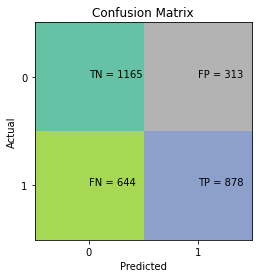

In [14]:

# make predictions on validation data
y_pred_r2 = m1_r2.predict(X_val)

# evaluate model
accuracy, confusion_matrix = evaluate(y_val.map({'cat':0,'dog':1}),np.where(y_pred_r2=='dog',1,0))
print(f'Accuracy: {accuracy}')
plot_confusion_matrix(confusion_matrix)


In [18]:
# feature extraction - test data
features_test_r2 = get_features_r2(test_image)
print(features_test_r2.shape)

# get model predictions
predictions_r2 = m1_r2.predict(features_test_r2)
print(predictions_r2)
     

(1000, 24484)
['dog' 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'cat' 'dog' 'dog' 'cat' 'dog'
 'dog' 'cat' 'dog' 'dog' 'cat' 'dog' 'dog' 'cat' 'cat' 'dog' 'dog' 'cat'
 'cat' 'cat' 'cat' 'dog' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat' 'cat' 'cat'
 'cat' 'dog' 'cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'cat'
 'cat' 'dog' 'cat' 'cat' 'cat' 'dog' 'dog' 'cat' 'dog' 'cat' 'cat' 'cat'
 'dog' 'cat' 'cat' 'dog' 'dog' 'cat' 'dog' 'dog' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'dog' 'cat' 'dog' 'dog' 'cat' 'cat'
 'cat' 'dog' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'cat' 'dog' 'dog' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'cat' 'dog' 'dog' 'cat' 'dog' 'dog'
 'dog' 'dog' 'cat' 'dog' 'dog' 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'cat'
 'cat' 'dog' 'cat' 'dog' 'cat' 'cat' 'cat' 'cat' 'dog' 'cat' 'cat' 'cat'
 'dog' 'dog' 'dog' 'cat' 'dog' 'cat' 'cat' 'cat' 'dog' 'cat' 'dog' 'cat'
 'cat' 'cat' 'dog' 'dog' 'cat' 'dog' 'cat' 'dog' 'dog' 'dog' 'cat' 'dog'
 'cat' 'cat' 'dog' 'cat' 'dog' 'cat' 

#import predictions to the json file

In [20]:
df_test['prediction_r2']=predictions_r2

# Save the predictions to a .csv file
df_test.to_csv('test-predictions.csv', index=False)


In [22]:
df_test

,id,prediction_r2
0,1,dog
1,2,cat
2,3,cat
3,4,cat
4,5,dog
...,...,...
995,996,dog
996,997,dog
997,998,cat
998,999,cat


In [23]:
import json
import pandas as pd

test_file_path = "/content/test-predictions.csv"
df_test2 = pd.read_csv(test_file_path)
df_test2 = df_test2[["id", "prediction_r2"]]

data = []
for index, row in df_test2.iterrows():
    data.append({'id': row['id'], 'prediction': row['prediction_r2']})

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    for item in data:
        fp.write(json.dumps(item) + '\n')
